## Instance Segmentation of Kaggle's Open Images Instance Segmentation RVC 2020 edition
Author: S. Michael

Instance segmentation identifies and separates individual objects within an image. Boundary detection for and the assignment of a unique label to each object is an inherent part of this computer vision tool. The goal of instance segmentation is to produce a pixel-wise segmentation map of the image, where each pixel is assigned to a specific object instance.

This notebook uses Pixellib, a python library based on the Mask M-RCC framework (https://github.com/ayoolaolafenwa/PixelLib/blob/master/Tutorials/image_instance.md), to predict features in a set of test images for the Kaggle challenge: Open Images Instance Segmentation RVC 2020 edition.  

Convolutional Neural Networks are the basic building blocks for computer vision's image segmentation. The various layers of a CNN work together to learn how to identify and recognize objects of interest in an image. Simple CNNs classify and detect single objects in an image.

For multiple object identification and recognition in an image, a more complex architecture than a simple CNN is needed. A region-based CNN (R-CNN) is used for image detection of multiple objects. Bounding boxes evaluate convolutional networks independently on all the Regions of Interest (ROI) to classify objects of interest.

Faster RCNNs use Region Proposal Networks (RCNs) to generate RoIs with mulitple objects of interest and Region of Interest Pooling (RoIPool) to extract a feature map of an image through classification and bounding box regression. Mask R-CNN is built on top of Faster R-CNNs for image segmentation. Digital images are partitioned into multiple segments or sets of pixels to locate objects and boundaries.

Instance segmentation is a combination of object detection, object localization, and object classification. It clearly distinguishes between each object classified as similar instances. Mask R-CNN extends Faster R-CNN by adding a third foundational element to RPNs and RoIPool - an pbject mask. This mask works in parallel with the first two elements to enable both bounding box recognition and feature prediction.

The ease of implementation, high performance and efficiency of Mask R-CNN algorithms foster their use in a variety of applications across many industries. Because of this, the Mask R-CNN algorithm is the chosen model for this notebook 


#### Why Pixellib

After experiencing keras dependency challenges with TensorFlow 2 in both colab and jupyter notebook, Pixellib was chosen as the library performing instance segmentation on COCO 2017 val. Starter code was cloned from github and the coco weights and biases were downloaded.

Exhausted GPU credits in colab, cpu and memory limitations on my personal laptop, and struggles wth international connections (work took me to Dubai) made training the model on the available-to-download training images an impossibility. My computer timed out before completion. Thus, a pretrained model was used using the coco dataset of 80 features. I recognize that this model severely limits the labeling of the 300 features present in both Kaggle's train and test data, but I tried to make the best choices with my available resources.

Using only pre-trained models, supports instance segmentation and can be used to segment objects in images. It was chosen, however, because its simplicity befriended my CPU/GPU limitations. My laptop could run instance segmentation models using Pixellib without timing out.

I had hoped to run the test images on several pretrained models. Notably, the Mask R-CNN algorithm (https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5) and pointrend_resnet50.pkl ( ). However, I could not troubleshoot around dependency issues between Pillow and Keras. This notebook performs instance segmentation using only the pretrained model, mask_rcnn_coco.h5.

### Steps used for INstance Segmentation

1. Load libraries
2. Clone Mask R-CNN starter code (this starter code was ultimately was not needed for Pixellib. It did create directories for the remaibning steps and was thus left into the final write-up)
3. Download pre-trained coco weights
4. Download test images: Kaggle Open Images Instance Segmentation RVC 2020 edition
5. Explore test images
6. Implement Instance Segmentation on random subset of test_images
7. Submission to Kaggle

### **Load Libraries**
#### **Load Reqs**

In [26]:
!pip3 install imgaug pixellib

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


#### **Import Libraries**

In [2]:
#save images to csv file for easy recall
import glob
import pandas as pd
import csv
#visualize images
import matplotlib.pyplot as plt
from PIL import Image
from pixellib.custom_train import instance_custom_training
#load pretrained model
import pixellib
from pixellib.instance import instance_segmentation

2023-12-08 12:49:42.525028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### **Clone Mask R-CNN Starter Code**

In [3]:
%cd ~/ds_jungle/computer_vision
#!git clone --quiet https://github.com/matterport/Mask_RCNN.git
#there is an issue with the mrcnn file & tensorflow 2 --> trying different starter code adapted to tf2
!git clone https://github.com/BupyeongHealer/Mask_RCNN_tf_2.x.git

/Users/sherilyn/ds_jungle/computer_vision
Cloning into 'Mask_RCNN_tf_2.x'...
remote: Enumerating objects: 964, done.
remote: Total 964 (delta 0), reused 0 (delta 0), pack-reused 964
Receiving objects: 100% (964/964), 126.42 MiB | 9.82 MiB/s, done.
Resolving deltas: 100% (573/573), done.
Updating files: 100% (76/76), done.


In [4]:
#install reqs
%cd ~/ds_jungle/computer_vision/Mask_RCNN_tf_2.x
!pip install -q PyDrive
!pip install -r requirements.txt
!python3 setup.py install

/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x
DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/setuptools/dist.py:771: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  warnings.warn(
/Library/Frame

### **Download pre-trained coco weights**

matterport_maskrcnn_2017 citation:

Abdulla, W. (2017) Mask R-CNN for object detection and instance segmentation on Keras and TensorFlow. Github repository. Github. https://github.com/matterport/Mask_RCNN 


In [20]:
%cd  ~/ds_jungle/computer_vision/Mask_RCNN_tf_2.x
#!brew install wget
!wget --quiet https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5
!ls

/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x
LICENSE
MANIFEST.in
README.md
assets
build
dist
images
mask_rcnn.egg-info
mask_rcnn_coco.h5
mrcnn
open-images-instance-segmentation-rvc-2020.zip
requirements.txt
samples
setup.cfg
setup.py
test
test_imgs.csv


### **Download Test Images: Kaggle Open Images Instance Segmentation RVC 2020 edition**

#### **Load reqs**

In [21]:
#Install the Kaggle library
#!pip install -q kaggle

#### **Create Kaggle Directory**

In [7]:
#create kaggle directory
!mkdir ~/.kaggle
#load kaggle credentials (api token)
!echo '{"username":"sherylmichael","key":"ee2137bd8d95cc0d1f29d42dc871a87d"}' > ~/.kaggle/kaggle.json
#Allocate required permission for file, kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/sherilyn/.kaggle: File exists


#### **Download & unzip test images**

In [10]:
#! kaggle datasets list
#download test image data: open-images-instance-segmentation-rvc-2020
#!kaggle competitions download -c open-images-instance-segmentation-rvc-2020

In [11]:
%cd ~/ds_jungle/computer_vision/Mask_RCNN_tf_2.x
# ******* stopped unzip process before complete due to CPU & time issues *********
#! unzip open-images-instance-segmentation-rvc-2020.zip

/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x


#### **Create dataframe of test images**

In [13]:
test_images = glob.glob('/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/*.jpg')
print('type(test_images): ', type(test_images))
print('len(test_images): ', len(test_images))
test_imgs = pd.DataFrame(test_images)
test_imgs.rename(columns = {0:'id'}, inplace = True)
test_imgs.rename(columns = {0:'id'}, inplace = True)

type(test_images):  <class 'list'>
len(test_images):  30608


In [14]:
print(test_imgs.info())
print(test_imgs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30608 entries, 0 to 30607
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30608 non-null  object
dtypes: object(1)
memory usage: 239.2+ KB
None
                                                  id
0  /Users/sherilyn/ds_jungle/computer_vision/Mask...
1  /Users/sherilyn/ds_jungle/computer_vision/Mask...
2  /Users/sherilyn/ds_jungle/computer_vision/Mask...
3  /Users/sherilyn/ds_jungle/computer_vision/Mask...
4  /Users/sherilyn/ds_jungle/computer_vision/Mask...


#### **Save & read test images to/from csv file**

In [16]:
#save test_images to csv
test_imgs.to_csv('/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test_imgs.csv')

In [17]:
#read test_imgs df to list
# Open the file in 'r' mode, not 'rb'
csv_file = open('/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test_imgs.csv','r')
test_images = []

# Read off and discard first line, to skip headers
csv_file.readline()

# Split columns while reading
for a, b in csv.reader(csv_file, delimiter=','):
    # Append each variable to a separate list
    test_images.append(b)

test_images[3:10]

['/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/3966fc73b7fa556c.jpg',
 '/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/26e5647480924ec2.jpg',
 '/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/06e1928075762adb.jpg',
 '/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/1cf84bdcff9e83f8.jpg',
 '/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/05880795c0ca3658.jpg',
 '/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/0c8cdbdb3923703b.jpg',
 '/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x/test/139779701ff4596d.jpg']

### **Explore test images**

#### Visualizing Random Images: test_images

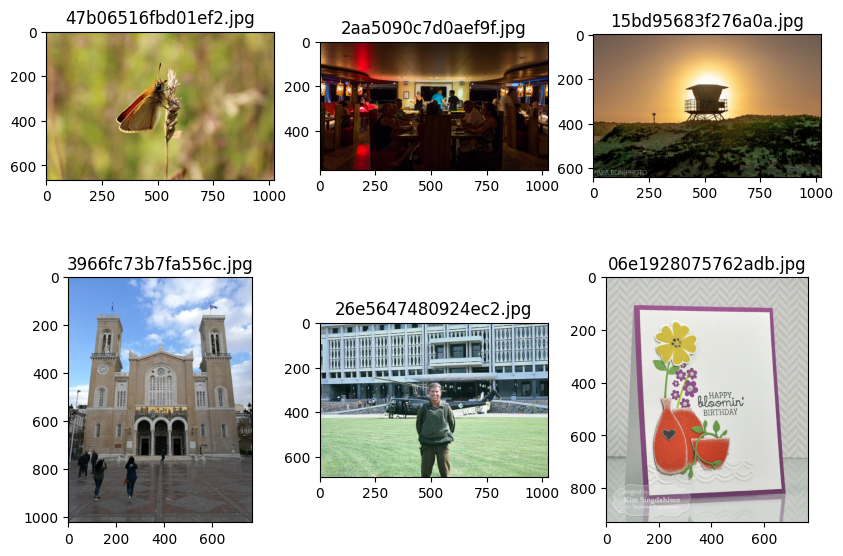

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for image, ax in enumerate(axes.ravel()):
    img = Image.open(test_images[image])
    ax.set_title(test_images[image].split('/')[-1])
    ax.imshow(img)

In [22]:
!pwd
!ls

/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN_tf_2.x
LICENSE
MANIFEST.in
README.md
assets
build
dist
images
mask_rcnn.egg-info
mask_rcnn_coco.h5
mrcnn
open-images-instance-segmentation-rvc-2020.zip
requirements.txt
samples
setup.cfg
setup.py
test
test_imgs.csv


### **Implement Instance Segmentation on random subset of test_images**

Per official documentation (https://pixellib.readthedocs.io/en/stable/#:~:text=PixelLib%20supports%20the%20two%20major,segmented%20with%20the%20same%20colormaps.&text=2%20In), the following dependencies are required for Pixellib: 

In [55]:
!pip3 install pip
!pip3 install tensorflow
!pip3 install opencv-python
!pip3 install pillow
!pip3 install scikit-image
!pip3 install pixellib

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg 

#attemted fix for bounding boxes not showing properly - tried using a second pretrained model --> challenges with PIL deprecating attribute,

#LINEAR --> #https://pillow.readthedocs.io/en/stable/deprecations.html

BILINEAR import did not fix PIL attribute problem

!pip3 install pycocotools

!pip3 install pixellib -upgrade

!pip3 install --upgrade Pillow

from PIL.Image import BILINEAR

import pixellib 

from pixellib.torchbackend.instance import instanceSegmentation 

ins = instanceSegmentation() 

ins.load_model("pointrend_resnet50.pkl") 

ins.segmentImage(test_images[10], show_bboxes=True, output_image_name="output_image.jpg")


In [56]:
#create instance
segment_image = instance_segmentation()
#load the mask rcnn model to perform instance segmentation using pretrained coco weights and biases
segment_image.load_model("/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN/mask_rcnn_coco.h5")

2023-12-08 16:38:40.559982: W tensorflow/c/c_api.cc:300] Operation '{name:'bn4n_branch2a/beta/Assign' id:3332 op device:{requested: '', assigned: ''} def:{{{node bn4n_branch2a/beta/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](bn4n_branch2a/beta, bn4n_branch2a/beta/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [77]:
#test on one image

#image before segmentation
img=Image.open(test_images[16])
img.show()

#Pixellib performs image preprocessing as part of the step, segment_image.segmentImage()
#perform instance segmentation on an image with two parameters:
#path_to_image: The path to the image to be predicted by the model.
#show_bboxes: implement instance seg with bounding boxes
results, segmented_image = segment_image.segmentImage(test_images[16], show_bboxes=True)
seg_img = Image.fromarray(segmented_image)
seg_img.save('segmented_image.jpg')
seg_img.show()
print(segmented_image.shape)
print(results)

(768, 1023, 3)
{'rois': array([[   0,   14,  768,   35],
       [   0,   14,  768,   17],
       [   0,   19,  768,   21],
       [   0,   17,  768,   22],
       [   0,   22,  768,   24],
       [   0,   43,  768,   64],
       [   0,   52,  768,   58],
       [   0,    0,  768,   23],
       [   0,   48,  768,   52],
       [   0,   27,  768,   33],
       [   0,   43,  768,   50],
       [   0,   30,  768,   32],
       [   0,  598,  768,  602],
       [   0,   56,  768,   61],
       [   0,  595,  768,  604],
       [   0,   75,  768,   97],
       [   0,   84,  768,   91],
       [   0,  257,  768,  263],
       [   0,   54,  768,   76],
       [   0,  117,  768,  130],
       [   0,   65,  768,   69],
       [   0,   62,  768,   65],
       [   0,   68,  768,   81],
       [   0,  260,  768,  267],
       [   0,  246,  768,  267],
       [   0,  602,  768,  606],
       [   0,   77,  768,   82],
       [   0,  125,  740,  131],
       [   0,  604,  768,  614],
       [   0,  254,

In [91]:
import numpy as np
#access segmentation results
masks = results['masks']
class_ids = results['class_ids']
bounding_boxes = results['rois']
predictionString = results['scores']
print('predictionString: ', np.mean(predictionString))

predictionString:  0.9999994


In [36]:
# fix for pixellib not showing bounding boxes properly-->https://stackoverflow.com/questions/72676258/pixellib-not-detecting-objects-properly
!pip install pixellib --upgrade
!pip install tensorflow==2.12.0

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mask_rcnn-2.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [93]:
import random, os
#from pixellib.tune_bg import alter_bg
random_images = random.sample(test_images, 5)

submission_dic = {'ImageID': [], 'ImageWidth': [], 'ImageHeight': [], 'PredictionString': []}
for image in random_images:
    with open(image,"rb") as file:
        results, segmented_image = segment_image.segmentImage(image, show_bboxes=True)
        seg_img = Image.fromarray(segmented_image) 
        image_path_and_name = os.path.split(str(file))
        image_name_and_ext = os.path.splitext(image_path_and_name[1]) 
        name = 'segmented_' + image_name_and_ext[0] + '.jpg'
        output_path = '/Users/sherilyn/ds_jungle/computer_vision/Mask_RCNN/output_images'
        file_path = os.path.join(output_path, name)
        seg_img.save(file_path)
        seg_img.show()
        submission_dic['ImageID'].append(image_name_and_ext[0])
        submission_dic['ImageWidth'].append(segmented_image.shape[0])
        submission_dic['ImageHeight'].append(segmented_image.shape[1])
        submission_dic['PredictionString'].append(np.mean(results['scores']))

In [94]:
submission_dic

{'ImageID': ['160101e60a79c5af',
  '3a92ffa90e3ac59b',
  '4a5938451f2ddf07',
  '3d2a253fdb1ba6a9',
  '04e6ed33ca978199'],
 'ImageWidth': [683, 681, 682, 1024, 680],
 'ImageHeight': [1024, 1024, 1024, 682, 1024],
 'PredictionString': [0.99999994,
  0.99999994,
  0.99999857,
  0.9999984,
  0.9999257]}

In [96]:
header = submission_dic.keys()
no_rows = len(submission_dic[list(header)[0]])

with open('submission.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(header)
    for row in range(no_rows):
        csvwriter.writerow([submission_dic[key][row] for key in header])

### Kaggle Submission

While I did not receive a score from Kaggle due to submission after the deadlihe, I am certain I would have scored poorly.

My reasoning:

1. The bounding boxes are incorrect.
2. Only 5 images of the test dataset were submitted (computing & memory issues).
3. The onjects in the test folder may not be well represented by the objects in the pretrained Mask R-CNN model.
4. The PredictionString submsiion for each image is not correct.

Submission to Kaggle was done to demonstrate the ability to navigate Kaggle submission process.

### Bounding boxes not behaving as should

Rather than rectangles defining object boundarues, the position and size of the bounding boxes generated in the instance segmentation processes above are not correct. Rather than rectangles defining object boundaries, they are very narrow and long rectangles. While I was unable to troubleshoot this, there may be a discongruency between the object in the test images and the objects used to train the pretrained Mask M-RCNN model. There also may be a discrepancy between dependencies required for Pixellib or the pretrained model and TensorFlow 2.0. Colab does not support TensorFlow 1.x, and I could not load a TensorFlow 1.x historical version into jupyter notebook. TensorFlow 2.x is GPU enabled. I found differing beliefs on whether this GPU-capability conflicted with my CPU-only laptop and was not able to load a TensorFlow 2.x CPU-only version to explore whether this impacted the output images.

### Next Steps
I would like to run this on a GPU-enabled system. 